In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option("display.max_columns",None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "C:\\Users\\sures\\OneDrive\\Documents\\Data Science\\Data Sets\\Visadataset - Visadataset.csv"
data = pd.read_csv(file_path)
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Basic Operations**

In [3]:
data.shape

(25480, 12)

In [4]:
data.size

305760

In [5]:
data.isnull()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,False,False,False,False,False,False,False,False,False,False,False,False
25476,False,False,False,False,False,False,False,False,False,False,False,False
25477,False,False,False,False,False,False,False,False,False,False,False,False
25478,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values 
for supose if there are any missig values then

 df.fillna(40,inplace = True)    fillng randomly
########################################################

df["name"].fillna("raheem",inplace = True)
df["age"].fillna(32,inplace=True)
df["city"].fillna("Blr",inplace = True)        #filling column wise
df
##########################################################

df.fillna(method='pad' or 'ffill')   #---- taking upper value  

###########################################################

df.fillna(method='bfill')    #----- taking lower value 

##############################################################

#---axis    (DAta frame will be rotated if we use axis )

df.fillna(method='pad',axis = 1)   #works horizontally

#########################################################

mean_age = df["age"].mean()      #----- mean
df["age"].fillna(mean_age)

######################################################

median_age = df["age"].median()    #----- median
df["age"].fillna(median_age)

##########################################################

mode_age = df["age"].mode()
df["age"].fillna(mode_age)      #------ mode


mode is used for categorical data

mean and median is used for numerical data

In [7]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

Dividing the cat and num columns seperately

In [8]:
num = data.select_dtypes(include = ["float64","int64"]).columns
cat = data.select_dtypes(include = ["object"]).columns

print(f"The numerical columns are : {num}")
print(f"The categorical columns are : {cat}")

print("--------------------------------------")
print(f"count of num : {len(num)}")
print(f"count of cat : {len(cat)}")

The numerical columns are : Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')
The categorical columns are : Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')
--------------------------------------
count of num : 3
count of cat : 9


We have to drop the columns which are having more than 30% of null values

In [9]:
#  df.drop("column_name",axis = 1,inplace = True)

**Outlier Analysis**

First we do analysis on Numerical data

In [10]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [11]:
for i in num:
    Count = round(data[i].count(),2)
    Min = round(data[i].min(),2)
    Max = round(data[i].max(),2)
    Mean = round(data[i].mean(),2)
    Median = round(data[i].median(),2)
    Mode = round(data[i].mode(),2)
    Std = round(data[i].std(),2)
    print(f"{i} count is : {Count}")
    print(f"{i} min value is : {Min}")
    print(f"{i} max value is : {Max}")
    print(f"{i} mean value is : {Mean}")
    print(f"{i} median value is : {Median}")
    print(f"{i} mode value is : {Mode}")
    print(f"{i} std value is : {Std}")
    print("-------------------------------------------")
    

no_of_employees count is : 25480
no_of_employees min value is : -26
no_of_employees max value is : 602069
no_of_employees mean value is : 5667.04
no_of_employees median value is : 2109.0
no_of_employees mode value is : 0    183
Name: no_of_employees, dtype: int64
no_of_employees std value is : 22877.93
-------------------------------------------
yr_of_estab count is : 25480
yr_of_estab min value is : 1800
yr_of_estab max value is : 2016
yr_of_estab mean value is : 1979.41
yr_of_estab median value is : 1997.0
yr_of_estab mode value is : 0    1998
Name: yr_of_estab, dtype: int64
yr_of_estab std value is : 42.37
-------------------------------------------
prevailing_wage count is : 25480
prevailing_wage min value is : 2.14
prevailing_wage max value is : 319210.27
prevailing_wage mean value is : 74455.81
prevailing_wage median value is : 70308.21
prevailing_wage mode value is : 0        100.66
1        102.70
2        105.96
3        108.12
4        109.06
5        110.51
6        111.11
7

In [12]:
data[num].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


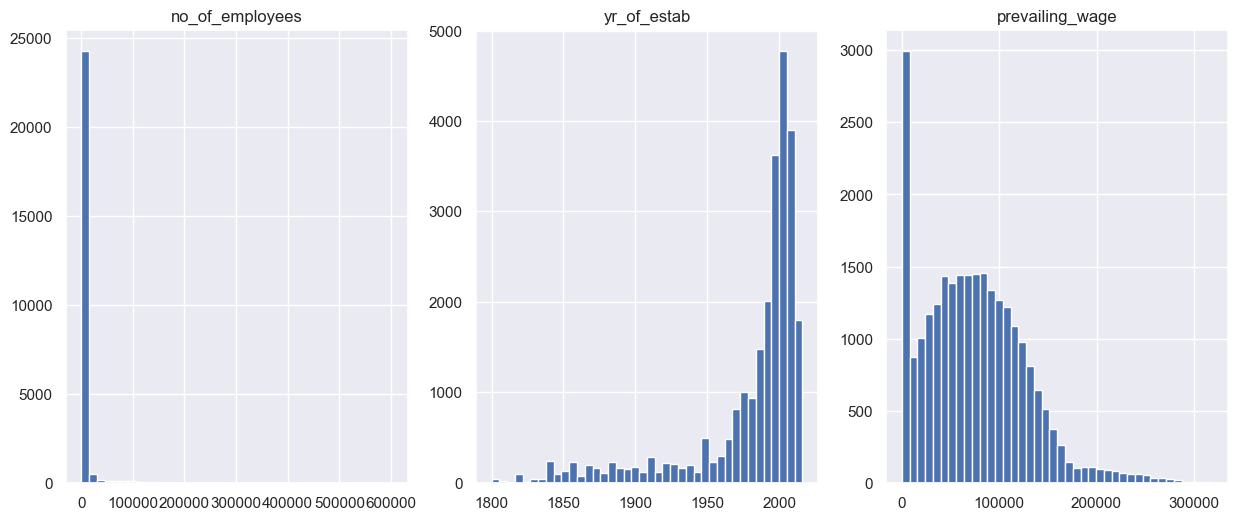

In [13]:
#plotting 
plt.figure(figsize = (15,20))
for i,column in enumerate(num):
    plt.subplot(3,3,i+1)
    plt.title(column)
    plt.hist(data[column],bins=40)
plt.show()

In [14]:
#Percentile Concept

for i in num:
    p1 = np.percentile(data[i],25)
    p2 = np.percentile(data[i],50)
    p3 = np.percentile(data[i],75)
    
    print(i,"p1 :",p1)
    print(i,"p2 :",p2)
    print(i,"p3 :",p3)
    print("--------------------------")
    
    
#25% or 25p means 25 percent data is below that value 

no_of_employees p1 : 1022.0
no_of_employees p2 : 2109.0
no_of_employees p3 : 3504.0
--------------------------
yr_of_estab p1 : 1976.0
yr_of_estab p2 : 1997.0
yr_of_estab p3 : 2005.0
--------------------------
prevailing_wage p1 : 34015.479999999996
prevailing_wage p2 : 70308.20999999999
prevailing_wage p3 : 107735.51250000001
--------------------------


In [15]:
#Quantile concept

for i in num:
    q1 = np.quantile(data[i],.25)
    q2 = np.quantile(data[i],.50)
    q3 = np.quantile(data[i],.75)
    
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',q3)
    print('-----------------')

no_of_employees q1: 1022.0
no_of_employees q2: 2109.0
no_of_employees q3: 3504.0
-----------------
yr_of_estab q1: 1976.0
yr_of_estab q2: 1997.0
yr_of_estab q3: 2005.0
-----------------
prevailing_wage q1: 34015.479999999996
prevailing_wage q2: 70308.20999999999
prevailing_wage q3: 107735.51250000001
-----------------


To know the outliers we use box plot to see

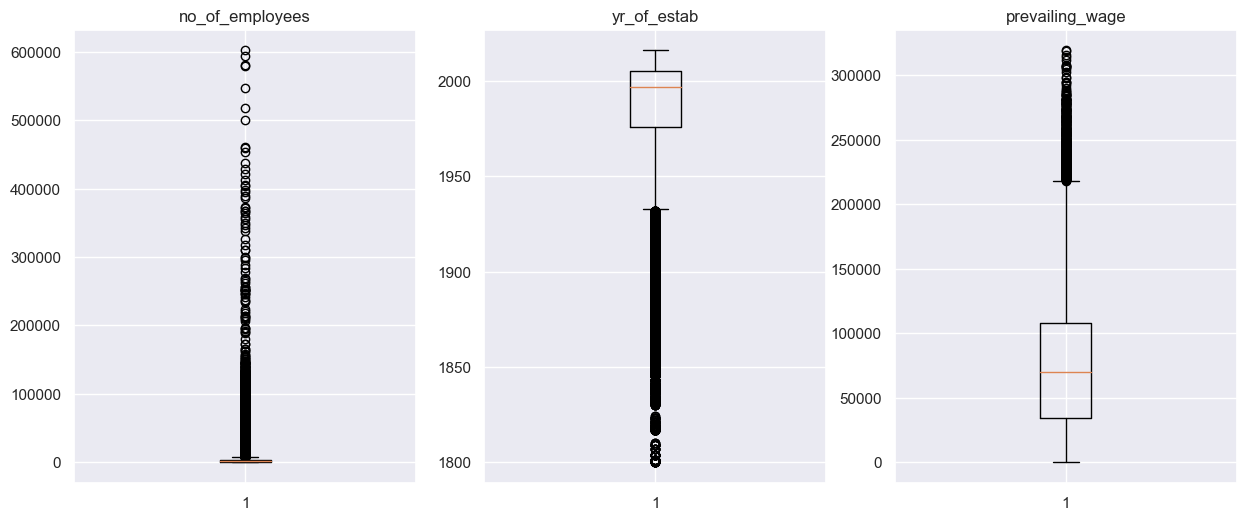

In [16]:
plt.figure(figsize=(15,20))

for i,column in enumerate(num):
    plt.subplot(3,3,i+1)
    plt.title(column)
    plt.boxplot(data[column])
    
plt.show()

Here we can see so many outliers  
  - We have to remove those outliers 

In [17]:
q1 = np.quantile(data["prevailing_wage"],.25)
q2 = np.quantile(data["prevailing_wage"],.50)
q3 = np.quantile(data["prevailing_wage"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)
cond1 = data["prevailing_wage"]>ub
cond2 = data["prevailing_wage"]<lb

outlier_data1 = data[cond1|cond2]

In [18]:
len(outlier_data1)

427

In [19]:
#Lets calculate the percentage of outlier with total observations

v1 = (len(outlier_data1)/len(data))*100
v1

1.6758241758241759

In [20]:
#non-outlier data

q1 = np.quantile(data["prevailing_wage"],.25)
q2 = np.quantile(data["prevailing_wage"],.50)
q3 = np.quantile(data["prevailing_wage"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)
cond1 = data["prevailing_wage"]<ub
cond2 = data["prevailing_wage"]>lb

non_outlier_data1 = data[cond1&cond2]

In [21]:
len(non_outlier_data1)

25053

In [22]:
len(data)

25480

In [23]:
q1 = np.quantile(data["yr_of_estab"],.25)
q2 = np.quantile(data["yr_of_estab"],.50)
q3 = np.quantile(data["yr_of_estab"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)
cond1 = data["yr_of_estab"]>ub
cond2 = data["yr_of_estab"]<lb

outlier_data2 = data[cond1|cond2]

In [24]:
len(outlier_data2)

3260

In [25]:
#percentage

v2 = (len(outlier_data2)/len(data))*100
v2

12.794348508634224

In [26]:
#non-outlier data

q1 = np.quantile(data["yr_of_estab"],.25)
q2 = np.quantile(data["yr_of_estab"],.50)
q3 = np.quantile(data["yr_of_estab"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)
cond1 = data["yr_of_estab"]<ub
cond2 = data["yr_of_estab"]>lb

non_outlier_data2 = data[cond1&cond2]

1997.0


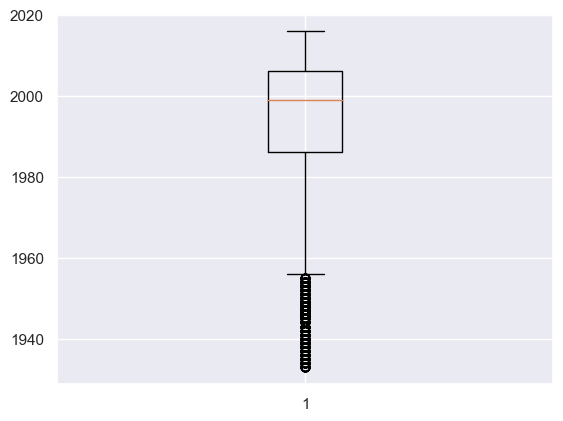

In [27]:
plt.boxplot(non_outlier_data2['yr_of_estab'])

print(data["yr_of_estab"].median())

In [124]:
q1 = np.quantile(data["yr_of_estab"],.25)
q2 = np.quantile(data["yr_of_estab"],.50)
q3 = np.quantile(data["yr_of_estab"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lbb = q1-(1.5*Iqr)
cond1 = data["yr_of_estab"]<ub
cond22 = data["yr_of_estab"]>lbb

non_outlier_data2 = data[cond1&cond22]



In [125]:
cond22 = data["yr_of_estab"]<lbb
cond22.fillna(1997)

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: yr_of_estab, Length: 25480, dtype: bool

In [113]:
len(data["yr_of_estab"])

25480

{'whiskers': [<matplotlib.lines.Line2D at 0x2050f821dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2050f823350>,
 'boxes': [<matplotlib.lines.Line2D at 0x2050fad2e50>],
 'medians': [<matplotlib.lines.Line2D at 0x2050f830810>],
 'fliers': [<matplotlib.lines.Line2D at 0x2050fa3da50>],
 'means': []}

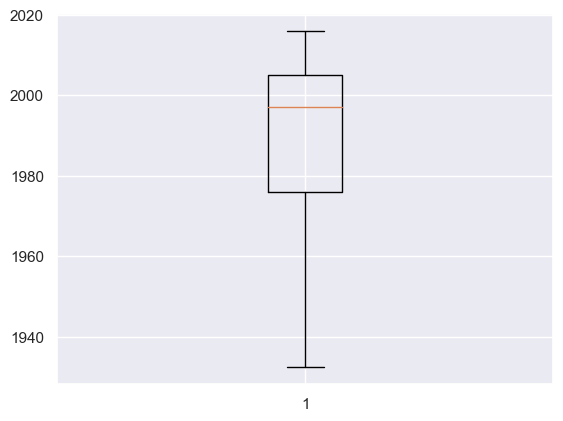

In [114]:
plt.boxplot(data['yr_of_estab'])

In [115]:
len(non_outlier_data2)
len(data["yr_of_estab"])

25480

In [116]:
q1 = np.quantile(data["no_of_employees"],.25)
q2 = np.quantile(data["no_of_employees"],.50)
q3 = np.quantile(data["no_of_employees"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)
cond1 = data["no_of_employees"]>ub
cond2 = data["no_of_employees"]<lb

outlier_data3 = data[cond1|cond2]

In [117]:
len(outlier_data3)

4

In [118]:
#percentage

v3 = (len(outlier_data3)/len(data))*100
v3

0.015698587127158554

In [119]:
#non-outliers data

q1 = np.quantile(data["no_of_employees"],.25)
q2 = np.quantile(data["no_of_employees"],.50)
q3 = np.quantile(data["no_of_employees"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)
cond1 = data["no_of_employees"]<ub
cond2 = data["no_of_employees"]>lb

non_outlier_data3 = data[cond1&cond2]

In [120]:
print(data["no_of_employees"].median())

12.82405956572474


In [121]:
cond2 = data["no_of_employees"]<lb

cond2.fillna(12.82)

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: no_of_employees, Length: 25480, dtype: bool

In [122]:
len(non_outlier_data3)

25476

In [126]:
cond22 = data["yr_of_estab"]<lbb
cond22.fillna(1997)

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: yr_of_estab, Length: 25480, dtype: bool

lets compare both outliers and non outliers data together

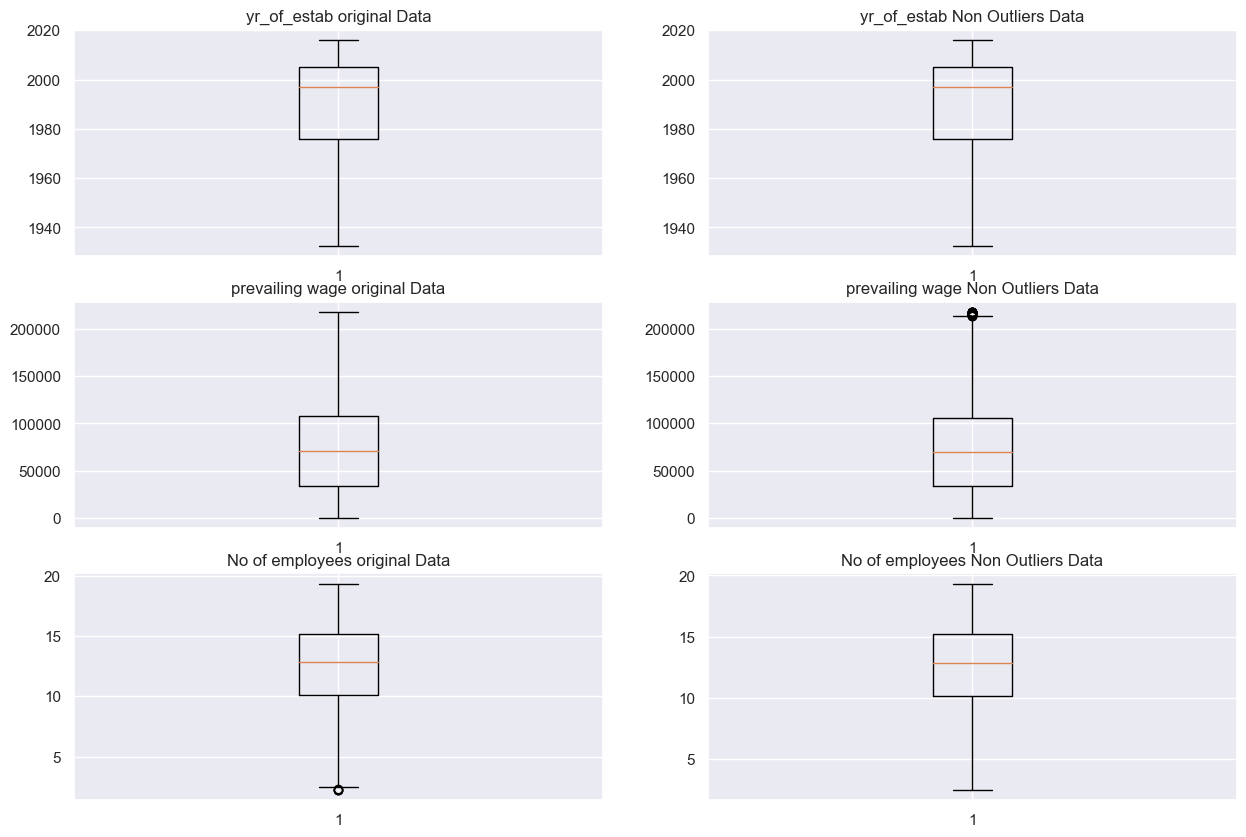

In [128]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.title("yr_of_estab original Data")
plt.boxplot(data["yr_of_estab"])
plt.subplot(3,2,2)
plt.title("yr_of_estab Non Outliers Data")
plt.boxplot(data["yr_of_estab"])

plt.subplot(3,2,3)
plt.title("prevailing wage original Data")
plt.boxplot(data["prevailing_wage"])
plt.subplot(3,2,4)
plt.title("prevailing wage Non Outliers Data")
plt.boxplot(non_outlier_data1["prevailing_wage"])

plt.subplot(3,2,5)
plt.title("No of employees original Data")
plt.boxplot(data["no_of_employees"])
plt.subplot(3,2,6)
plt.title("No of employees Non Outliers Data")
plt.boxplot(non_outlier_data3["no_of_employees"])

plt.show()

In [40]:
q1 = np.quantile(data["yr_of_estab"],.25)
q2 = np.quantile(data["yr_of_estab"],.50)
q3 = np.quantile(data["yr_of_estab"],.75)
Iqr = q3-q1
ub2 = q3+(1.5*Iqr)
lb2 = q1-(1.5*Iqr)

In [41]:
#by using np.clip we can directly remove the outliers


In [42]:
data["yr_of_estab"] = np.clip(data["yr_of_estab"],lb2,ub2)


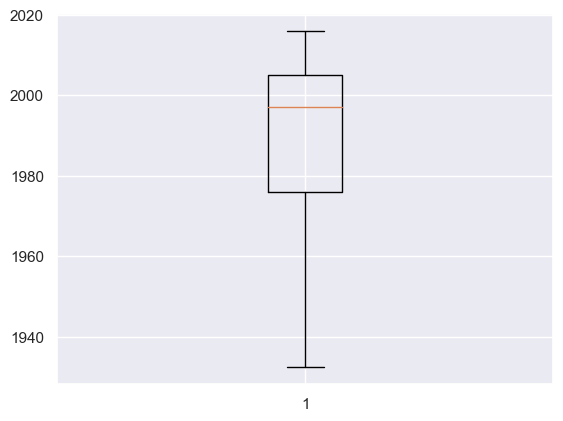

In [43]:
plt.boxplot(data["yr_of_estab"])
plt.show()

In [44]:
q1 = np.quantile(data["prevailing_wage"],.25)
q2 = np.quantile(data["prevailing_wage"],.50)
q3 = np.quantile(data["prevailing_wage"],.75)
Iqr = q3-q1
ub1 = q3+(1.5*Iqr)
lb1 = q1-(1.5*Iqr)
cond1 = data["prevailing_wage"]>ub
cond2 = data["prevailing_wage"]<lb

outlier_data1 = data[cond1|cond2]

data["prevailing_wage"] = np.clip(data["prevailing_wage"],lb1,ub1)

#data["no_of_employees"] = np.clip(data["no_of_employees"],lb,ub)

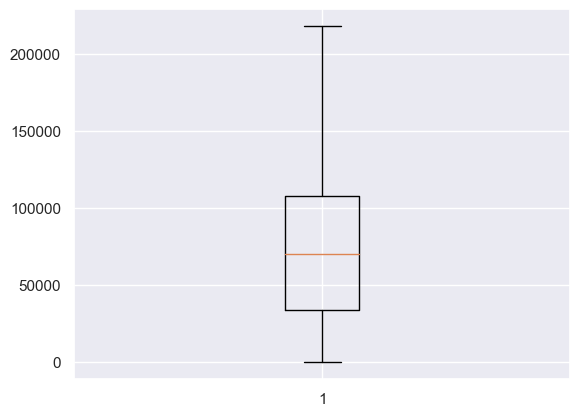

In [45]:
data["prevailing_wage"]  = np.clip(data["prevailing_wage"],lb1,ub1)
plt.boxplot(data["prevailing_wage"])
plt.show()



In [46]:
q1 = np.quantile(data["no_of_employees"],.25)
q2 = np.quantile(data["no_of_employees"],.50)
q3 = np.quantile(data["no_of_employees"],.75)
Iqr = q3-q1
ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)

data["no_of_employees"] = np.clip(data["no_of_employees"],lb,ub)

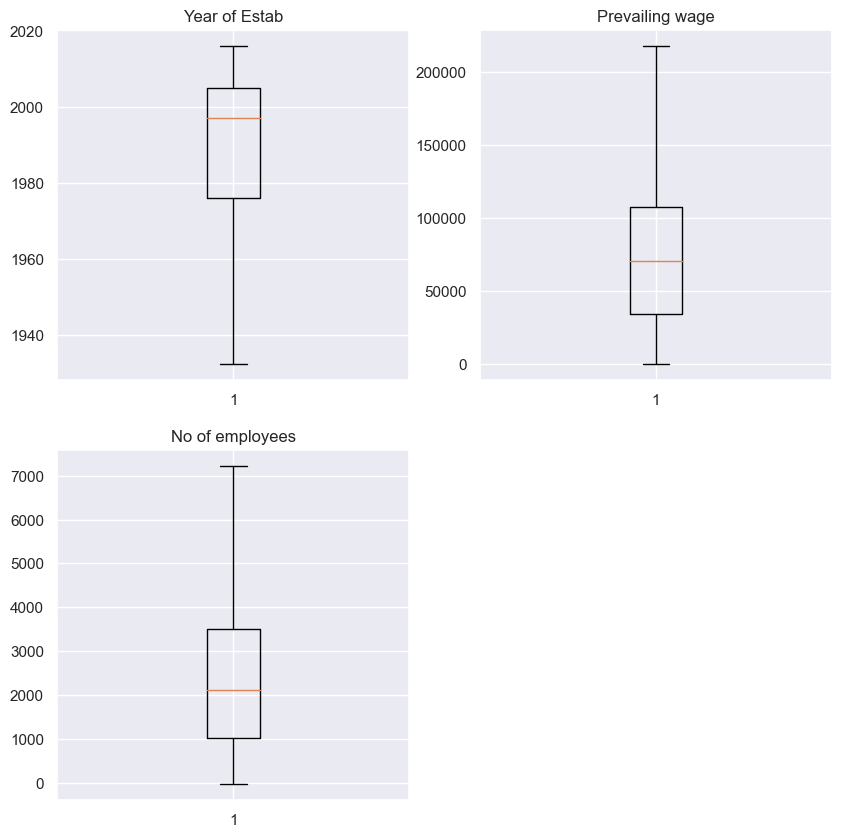

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Year of Estab")
plt.boxplot(data["yr_of_estab"])
plt.subplot(2,2,2)
plt.title("Prevailing wage")
plt.boxplot(data["prevailing_wage"])
plt.subplot(2,2,3)
plt.title("No of employees")
plt.boxplot(data["no_of_employees"])
plt.show()

**Data Transformation Skewed to Normal**

Converting skewed distribution to normal distribution

All maths developed by assumption that data follows normal distribution

**Methods**

log transformation

Reciprocal transformation

sqrt transformation

exponential transformation

box-cox transformation

yeo-jhanson transformation

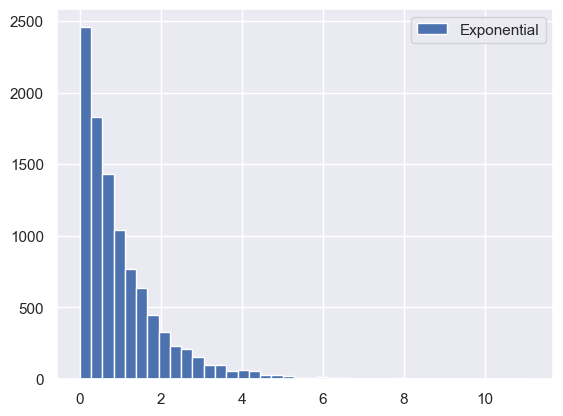

In [48]:
file = np.random.exponential(size = 10000)

plt.hist(file,bins = 40,label = "Exponential")
plt.legend()
plt.show()

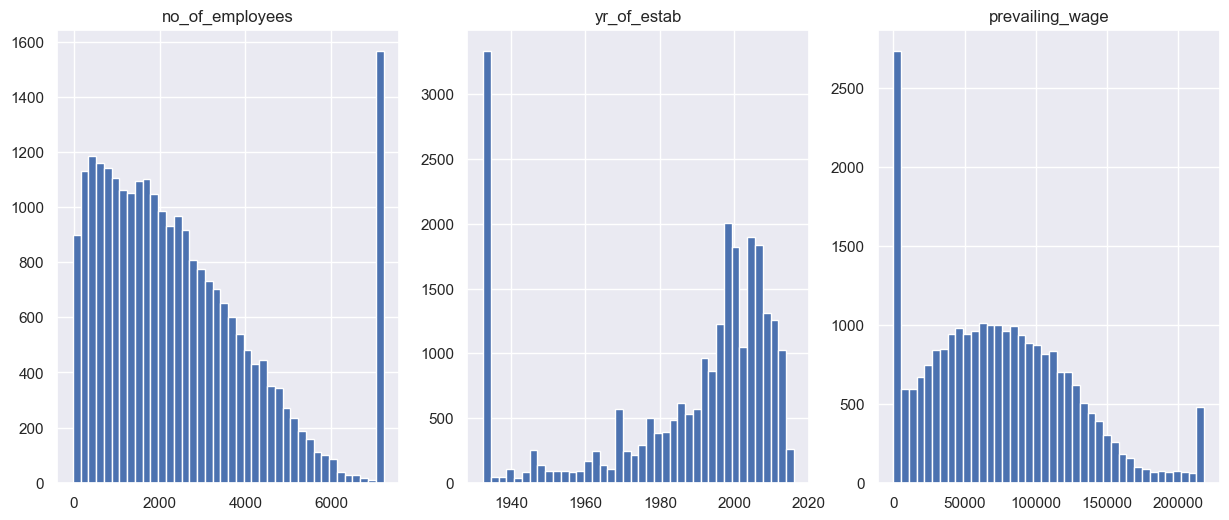

In [49]:
plt.figure(figsize = (15,20))
for i,column in enumerate(num):
    plt.subplot(3,3,i+1)
    plt.title(column)
    plt.hist(data[column],bins=40)
plt.show()

$Log-transformation$

np.log represents natural algorithm

Natural logrithm means base e

Exponential will multiply with log base e

Natural logrithm will works only on positive data

Log transformation will remove the skew

It will not convert into normal distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


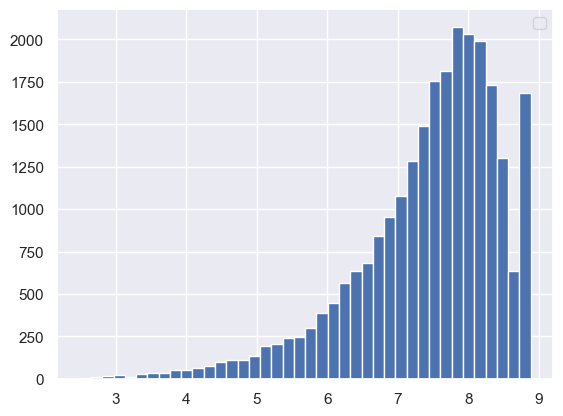

In [50]:
log_data = np.log(data['no_of_employees'])
plt.hist(log_data,bins = 40)
plt.legend()
plt.show()

In [51]:
data['no_of_employees']=data['no_of_employees']**(1/3)

In [52]:
data['no_of_employees'].skew()

-0.2337970012720049

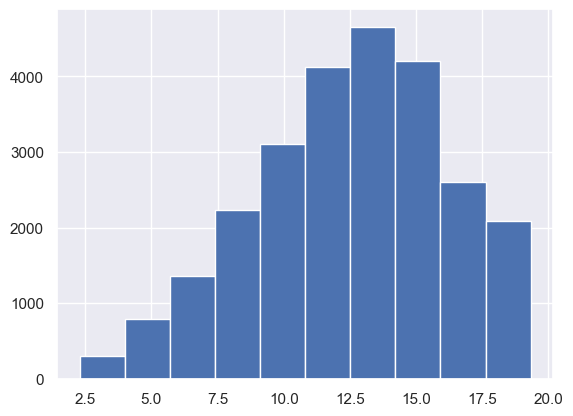

In [53]:
plt.hist(data['no_of_employees'])
plt.show()

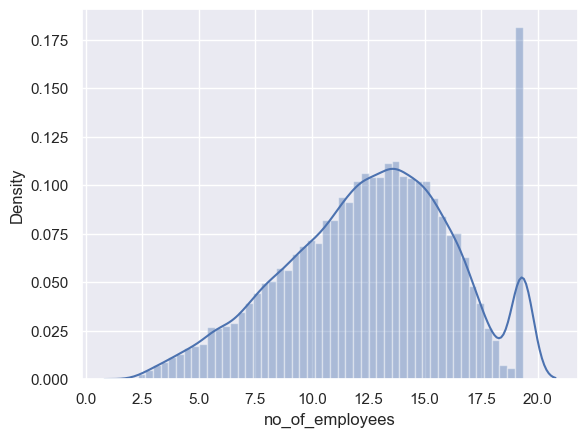

In [54]:
sns.distplot(data['no_of_employees'])
plt.show()

In [55]:
data["prevailing_wage"].skew()

0.546740685190096

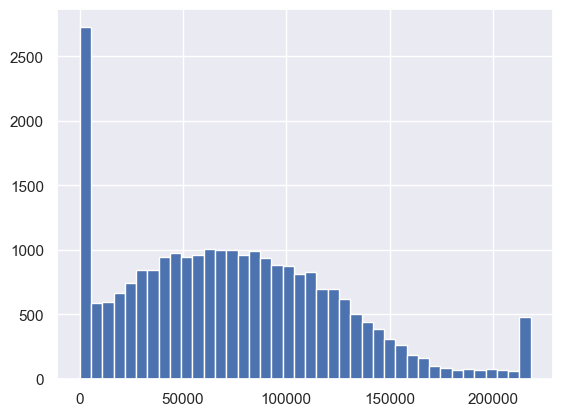

In [56]:
plt.hist(data["prevailing_wage"],bins=40)
plt.show()

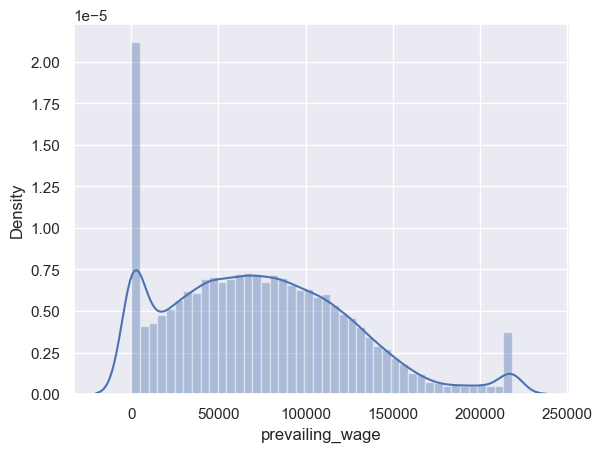

In [57]:
sns.distplot(data["prevailing_wage"])
plt.show()

**Reciprocal Transformation**

If data has zero, then it fails

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


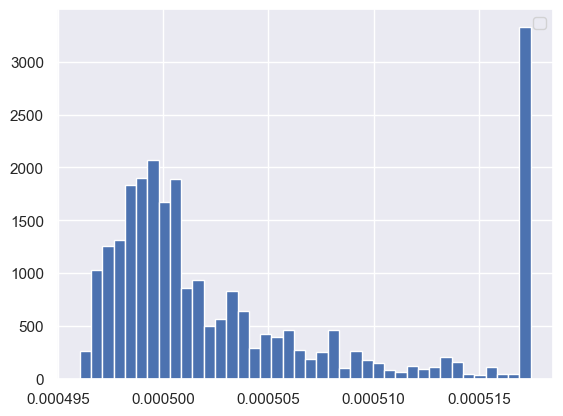

In [58]:
rec_data = 1/data["yr_of_estab"]
plt.hist(rec_data,bins=40)
plt.legend()
plt.show()

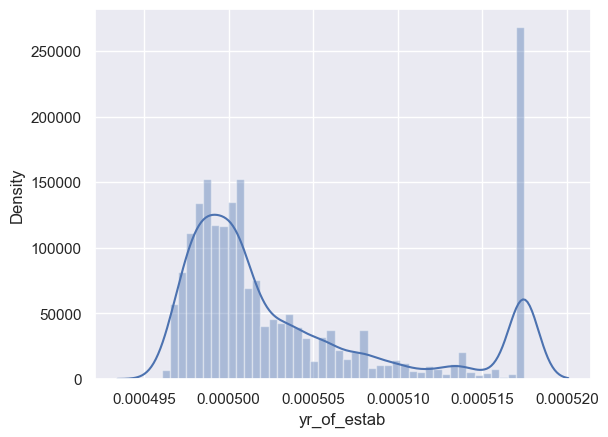

In [59]:
sns.distplot(rec_data)
plt.show()

**Sqrt Transformation**

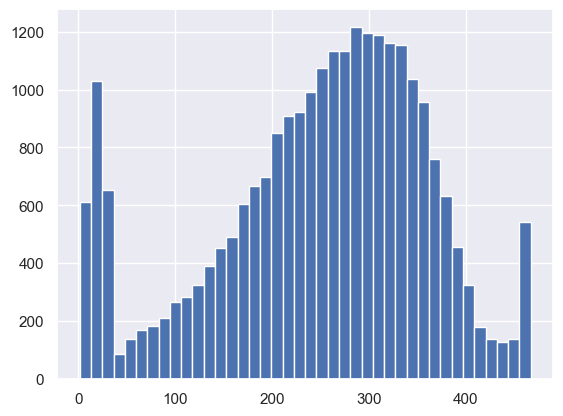

In [60]:
sqrt_data = np.sqrt(data['prevailing_wage'])
plt.hist(sqrt_data,bins=40)
plt.show()

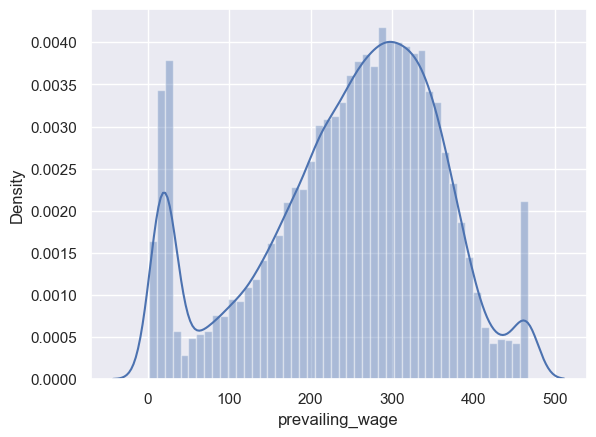

In [61]:
sns.distplot(sqrt_data)
plt.show()

**Bivariate and Multivariate Analysis**

In [62]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [63]:
col1 = data["continent"]
col2 = data["education_of_employee"]

result = pd.crosstab(col1,col2)
result

education_of_employee,Bachelor's,Doctorate,High School,Master's
continent,,,,
Africa,143,54,66,288
Asia,7168,923,2290,6480
Europe,1299,846,490,1097
North America,1225,258,401,1408
Oceania,66,22,36,68
South America,333,89,137,293


<Figure size 500x500 with 0 Axes>

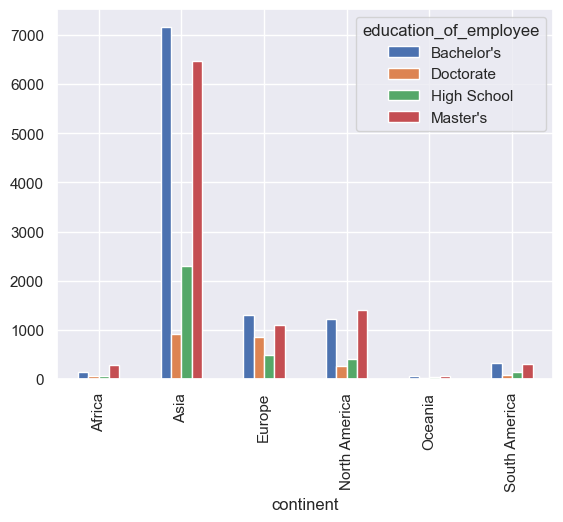

In [64]:
plt.figure(figsize=(5,5))
result.plot(kind = 'bar')
plt.show()

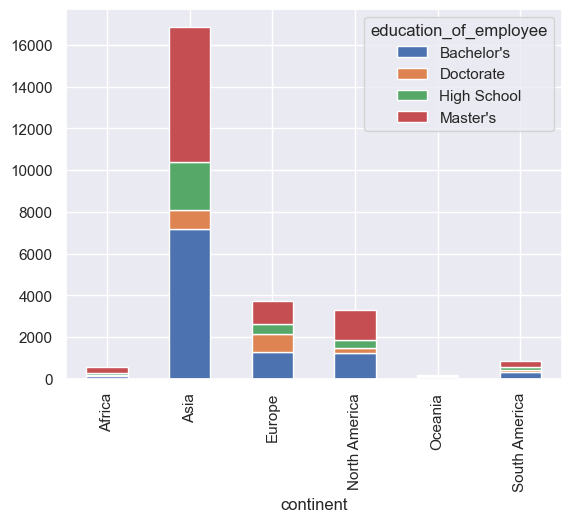

In [65]:
result.plot(kind = "bar",stacked = True)
plt.show()

**Multivariate Analysis**

In [66]:
col1 = data["continent"]
col2 = data["unit_of_wage"]
col3 = data["has_job_experience"]

result2 = pd.crosstab([col1,col2],col3)
result2

has_job_experience             N     Y
continent     unit_of_wage            
Africa        Hour            24    12
              Month            2     1
              Week             2     6
              Year           189   315
Asia          Hour           832   479
              Month           24    34
              Week            41   113
              Year          6174  9164
Europe        Hour            92    48
              Month            2     5
              Week             4    13
              Year          1478  2090
North America Hour           308   187
              Month            4    13
              Week            22    53
              Year          1014  1691
Oceania       Hour            11     7
              Month            0     2
              Week             1     3
              Year            77    91
South America Hour            98    59
              Month            0     2
              Week             3    11
              Year           276   403

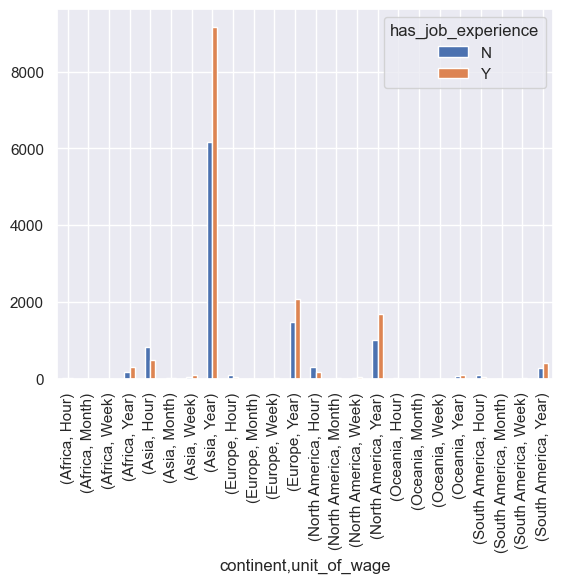

In [67]:
result2.plot(kind = "bar")
plt.show()

<Axes: ylabel='Density'>

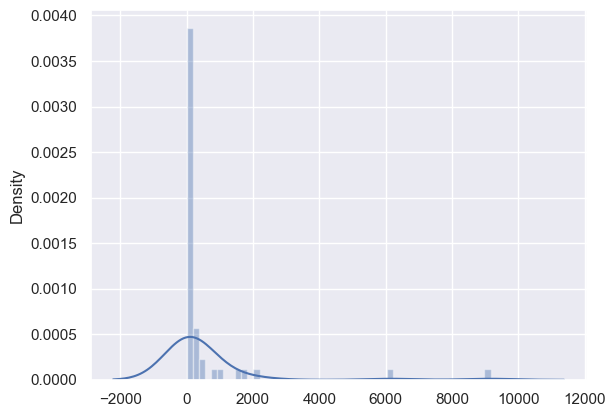

In [68]:
sns.distplot(result2)

**Numerical vs Numerical**

In [69]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

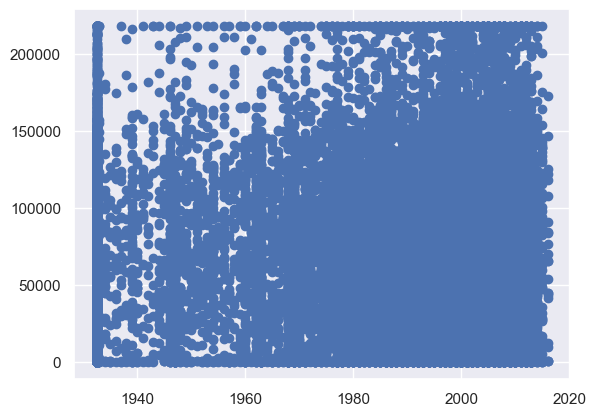

In [70]:
plt.scatter(data['yr_of_estab'],data["prevailing_wage"])

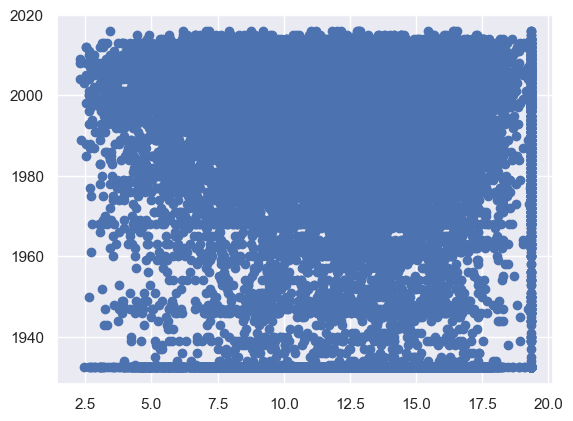

In [71]:
plt.scatter(data["no_of_employees"],data["yr_of_estab"])

**Categorical To Numerical Data Conversion**

In [72]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [73]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

ML models will develop by maths

Maths will consider only numbers 

It is very important to convert cat to num

- There are two types
  - Label Encoder
  - One Hot Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()

for i in cat:
    data[i] = LB.fit_transform(data[i])
    
#converts from cat to num

In [75]:
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,19.333895,2007.0,4,592.20290,0,1,1
1,1,1,3,1,0,13.410936,2002.0,2,83425.65000,3,1,0
2,2,1,0,0,1,19.333895,2008.0,4,122996.86000,3,1,1
3,3,1,0,0,0,4.610436,1932.5,4,83434.03000,3,1,1
4,4,0,3,1,0,10.266185,2005.0,3,149907.39000,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,13.752451,2008.0,3,77092.57000,3,1,0
25476,17205,1,2,1,0,14.848852,2006.0,2,218315.56125,3,1,0
25477,17206,1,3,1,0,10.388078,1932.5,3,146298.85000,3,0,0
25478,17207,1,3,1,1,12.424613,1932.5,4,86154.77000,3,1,0


**Correlation**

In [76]:
corr = data[num].corr()
corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.003996,-0.017416
yr_of_estab,-0.003996,1.000000,0.016122
prevailing_wage,-0.017416,0.016122,1.000000


<Axes: >

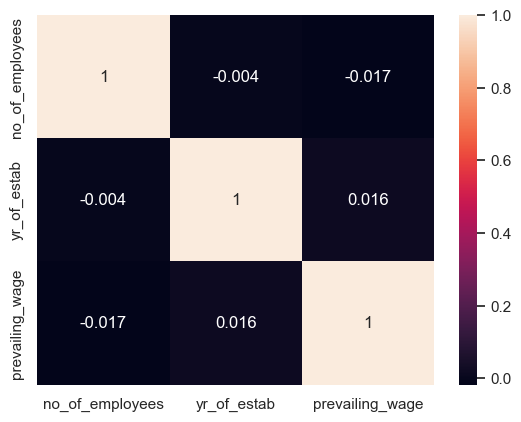

In [77]:
sns.heatmap(corr,annot = True)

**Read the data into input and target column**

In [78]:
X = data.drop("case_status",axis = 1)
y = data["case_status"]

In [79]:
X.shape,y.shape

((25480, 11), (25480,))

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=42,
                                                 test_size=0.2)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20384, 11)
(5096, 11)
(20384,)
(5096,)


**Removing the outlier using z-score**

In [82]:
from scipy import stats

columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

z_scores = np.abs(stats.zscore(X_train[columns]))

threshold = 3

outlier_indeces = np.where(z_scores>threshold)[0]

X_train = X_train.drop(X_train.index[outlier_indeces])
y_train = y_train.drop(y_train.index[outlier_indeces])


In [83]:
X_train.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
2403,15609,1,2,1,1,11.216112,2009.0,4,75107.37,3,1
6830,21964,3,3,1,0,9.209096,2012.0,4,102403.56,3,1
878,24137,1,2,1,0,9.857993,2005.0,3,89991.95,3,1
24061,15634,1,3,0,0,9.654894,1962.0,4,128104.61,3,1
2109,12343,2,2,0,0,15.230513,1993.0,4,12647.14,3,1


**Without Hyperperparamter Tuning**

   - Means we will not be giving any parameters
   - We will be using default parameters

$Decision Tree$

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Predictions**

In [85]:
y_pred_dt = dtree.predict(X_test)

In [86]:
print(y_test.values[:5])
print(y_pred_dt[:5])

[0 0 0 1 0]
[0 0 1 1 0]


**Metrics**

In [87]:
#using package methods

print(accuracy_score(y_test,y_pred_dt))
print(precision_score(y_test,y_pred_dt))
print(recall_score(y_test,y_pred_dt))
print(f1_score(y_test,y_pred_dt))

0.7211538461538461
0.5847772277227723
0.5575221238938053
0.5708245243128964


In [88]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

accuray is: 72.12
F1 is: 0.57
Precision is: 0.58
Recall is: 0.56


In [89]:
#bys using the formulas

tn,fp,fn,tp = confusion_matrix(y_test,y_pred_dt).ravel()

print(tn,fp,fn,tp)

accuracy = (tn+tp)/(tn+tp+fn+fp)

precision = tp/(tp+fp)

recall = tp/(tp+fn)

f1 = (2*precision*recall)/(precision+recall)

print(f'The accuracy is : {accuracy}')
print(f'The precision  is : {precision}')
print(f'The recall is : {recall}')
print(f'The f1 is : {f1}')

2730 671 750 945
The accuracy is : 0.7211538461538461
The precision  is : 0.5847772277227723
The recall is : 0.5575221238938053
The f1 is : 0.5708245243128964


In [90]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3401
           1       0.58      0.56      0.57      1695

    accuracy                           0.72      5096
   macro avg       0.68      0.68      0.68      5096
weighted avg       0.72      0.72      0.72      5096



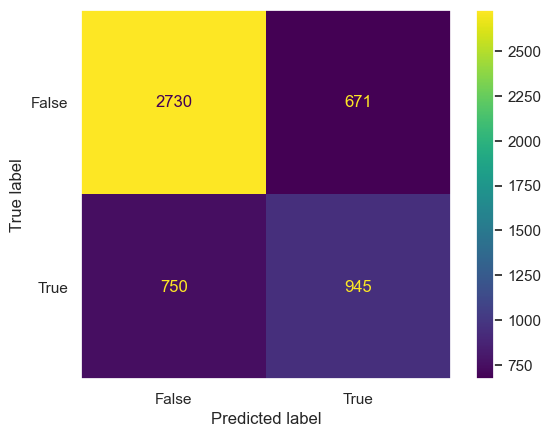

True negative: 2730
False postive: 671
False negative: 750
True postive: 945


In [91]:
# Confusion matrix

cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

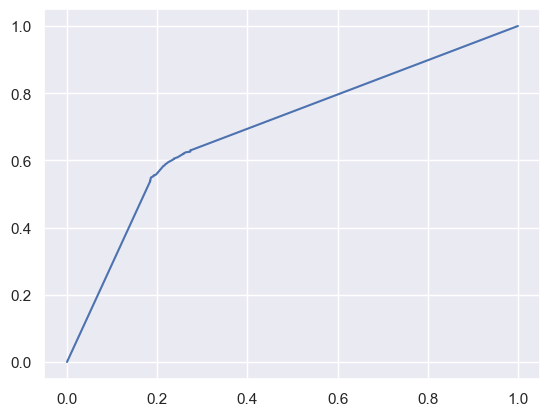

In [92]:
# ROC-AUC Curve

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

$Logistic Regression$

In [93]:
data.isnull().sum()

case_id                   0
continent                 0
education_of_employee     0
has_job_experience        0
requires_job_training     0
no_of_employees          33
yr_of_estab               0
region_of_employment      0
prevailing_wage           0
unit_of_wage              0
full_time_position        0
case_status               0
dtype: int64

In [138]:
X = data.drop("case_status",axis = 1)
y = data[["case_status"]]

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=42,
                                                 test_size=0.2)

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20384, 11)
(5096, 11)
(20384, 1)
(5096, 1)


In [157]:
# Mean1 = data["no_of_employees"].mean()
# data["no_of_employees"] = data["no_of_employees"].fillna(Mean1)

In [158]:
data.isnull().sum()
#print(len(X_train))
print(len(X_test))

5096


In [159]:
#-----------train the model 

from sklearn.linear_model import LogisticRegression
logtree = LogisticRegression()
logtree.fit(X_train,y_train)

#here our X_train contains null values ,so we have to drop them

LogisticRegression()

In [160]:
#--------------predictions

y_pred_log = logtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_log[:5])

[[0]
 [0]
 [0]
 [1]
 [0]]
[0 0 0 0 0]


In [161]:
#-------------- Metrics 

print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      3401
           1       0.00      0.00      0.00      1695

    accuracy                           0.67      5096
   macro avg       0.33      0.50      0.40      5096
weighted avg       0.45      0.67      0.53      5096



In [162]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 66.74
F1 is: 0.0
Precision is: 0.0
Recall is: 0.0


In [163]:
#--------------- Confusion matrix

cmt = confusion_matrix(y_test,y_pred_log)
cmt

array([[3401,    0],
       [1695,    0]], dtype=int64)

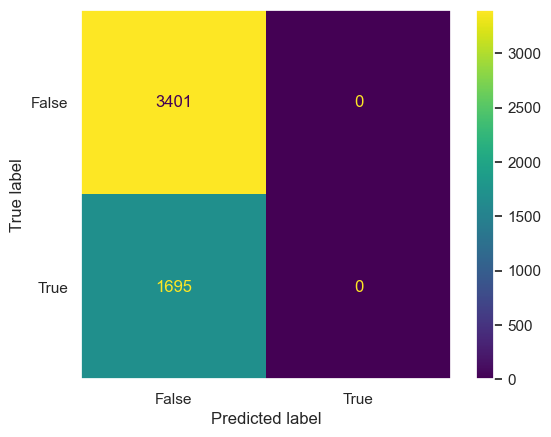

In [164]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False ,True])
disp.plot()
plt.grid(False)
plt.show()

In [165]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print(tn, fp, fn, tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False negative: ",fn)
print("True positive: ",tp)

3401 0 1695 0
True Negative:  3401
False Positive:  0
False negative:  1695
True positive:  0


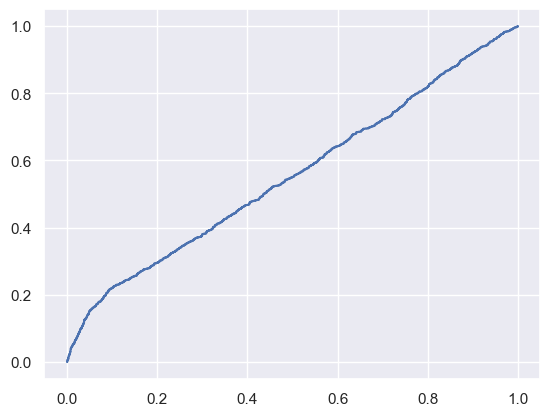

In [166]:
#--------------ROC-AUC curve

y_pred_log_prob = logtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_log_prob)
plt.plot(fpr,tpr)
plt.show()

$Naive Bayes$

In [167]:
from sklearn.naive_bayes import GaussianNB
NBtree = GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [168]:
y_pred_NB = NBtree.predict(X_test)

In [169]:
print(y_test.values[:5])
print(y_pred_NB[:5])

[[0]
 [0]
 [0]
 [1]
 [0]]
[0 0 0 0 0]


In [170]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 69.17
F1 is: 0.21
Precision is: 0.72
Recall is: 0.12


In [171]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cmt = confusion_matrix(y_test,y_pred_NB)
cmt

array([[3320,   81],
       [1490,  205]], dtype=int64)

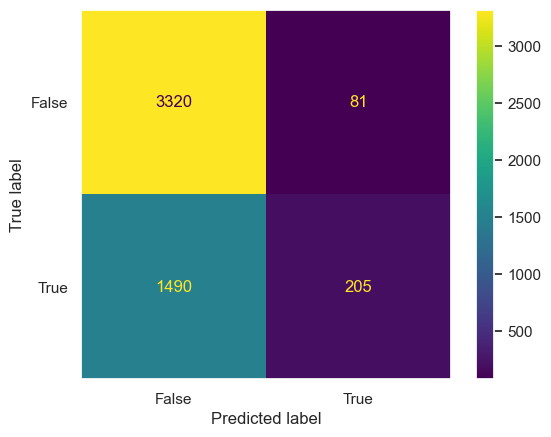

In [172]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

In [173]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print(tn, fp, fn, tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False negative: ",fn)
print("True positive: ",tp)

3320 81 1490 205
True Negative:  3320
False Positive:  81
False negative:  1490
True positive:  205


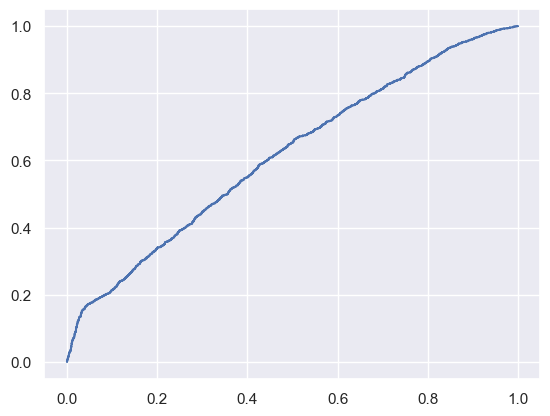

In [175]:
y_pred_NB_prob = NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_NB_prob)
plt.plot(fpr,tpr)
plt.show()

$KNN$

In [176]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree = KNeighborsClassifier()
KNNtree.fit(X_train,y_train)

KNeighborsClassifier()

In [177]:
y_pred_KNN = KNNtree.predict(X_test)

In [178]:
print(y_test.values[:5])
print(y_pred_KNN[:5])

[[0]
 [0]
 [0]
 [1]
 [0]]
[0 1 1 0 0]


In [179]:
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 62.91
F1 is: 0.34
Precision is: 0.42
Recall is: 0.29


In [180]:
cmt = confusion_matrix(y_test,y_pred_KNN)
cmt

array([[2716,  685],
       [1205,  490]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

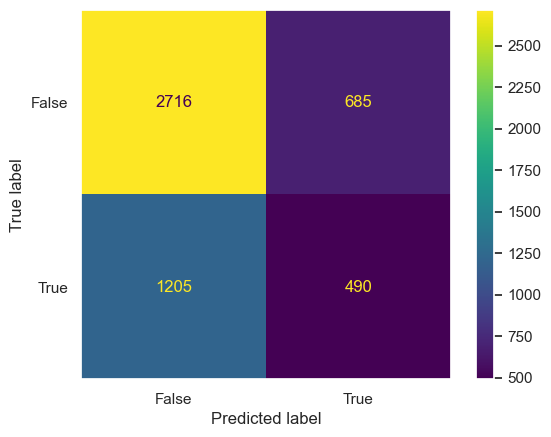

In [181]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show

In [182]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 2716
False postive: 685
False negative: 1205
True postive: 490


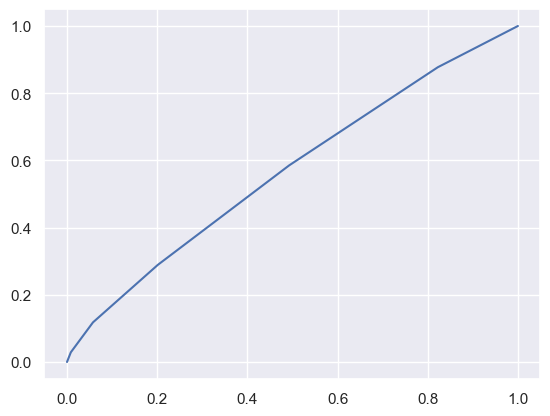

In [183]:
y_pred_KNN_prob = KNNtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_KNN_prob)
plt.plot(fpr,tpr)
plt.show()

$Random Forest$

In [185]:
from sklearn.ensemble import RandomForestClassifier
RFtree = RandomForestClassifier()
RFtree.fit(X_train,y_train)

RandomForestClassifier()

In [186]:
y_pred_RF = RFtree.predict(X_test)

In [187]:
print(y_test.values[:5])
print(y_pred_RF[:5])

[[0]
 [0]
 [0]
 [1]
 [0]]
[0 0 0 0 0]


In [188]:
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 78.65
F1 is: 0.62
Precision is: 0.76
Recall is: 0.53


In [189]:
cmt = confusion_matrix(y_test,y_pred_RF)
cmt

array([[3117,  284],
       [ 804,  891]], dtype=int64)

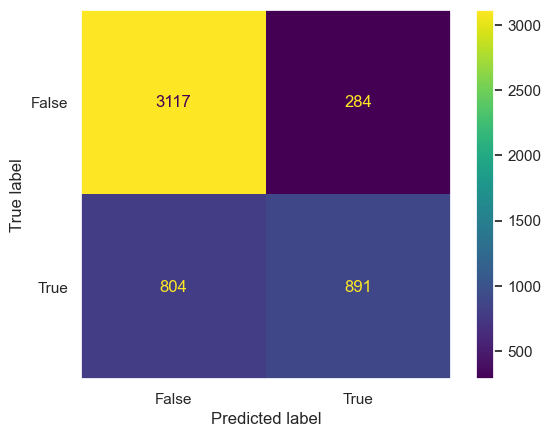

In [190]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels={False,True})
disp.plot()
plt.grid(False)
plt.show()

In [191]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 3117
False postive: 284
False negative: 804
True postive: 891


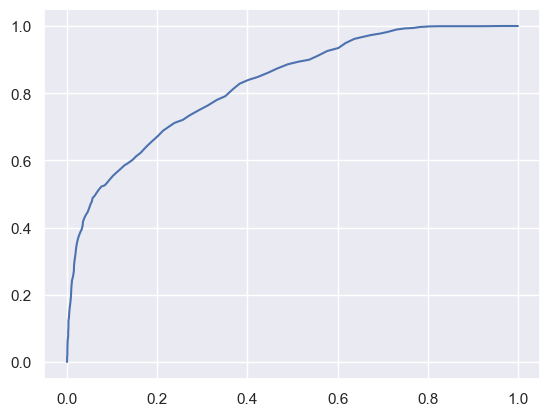

In [192]:
y_pred_RF_prob = RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_RF_prob)
plt.plot(fpr,tpr)
plt.show()

In [193]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,72.12,0.58,0.56,0.57
KNN,62.91,0.42,0.29,0.34
Logistic,66.74,0.00,0.00,0.00
Naive Bayes,69.17,0.72,0.12,0.21
Random Forest,78.65,0.76,0.53,0.62
